In [1]:
%reset -f

import pandas as pd
import numpy as np
# import folium   
import os
# import branca.colormap as cm
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.rcParams.update({'font.size': 16})
from matplotlib.transforms import ScaledTranslation
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.ticker import AutoLocator
import seaborn as sns

import nrarfcn as nr
# https://gitlab.com/alexander_marder/earfcn
# https://pypi.org/project/earfcn/0.0.3/
from earfcn.convert import earfcn2freq

In [2]:
df_5g_pdsch_agg = pd.read_csv('../_data/Spring2025_ArkansasNH/5g_pdsch_agg.csv')
df_5g_pdsch_agg = df_5g_pdsch_agg[(df_5g_pdsch_agg['Test Status']=='Completed') & (df_5g_pdsch_agg['Direction']=='Downlink')]
df_5g_pdsch_agg = df_5g_pdsch_agg[df_5g_pdsch_agg['Num PDSCH RBs'].notna()]
df_lte_pdsch_agg = pd.read_csv('../_data/Spring2025_ArkansasNH/lte_pdsch_agg.csv')
df_lte_pdsch_agg = df_lte_pdsch_agg[(df_lte_pdsch_agg['Test Status']=='Completed') & (df_lte_pdsch_agg['Direction']=='Downlink')]
df_lte_pdsch_agg = df_lte_pdsch_agg[df_lte_pdsch_agg['RBs'].notna()]

df_lte_pdsch_agg.rename(columns={'LTE Net PDSCH Throughput': 'Net PDSCH Throughput'}, inplace=True)
df_5g_pdsch_agg.rename(columns={'5G NR Net PDSCH Throughput': 'Net PDSCH Throughput'}, inplace=True)

In [3]:
print(df_lte_pdsch_agg['Collection'].value_counts().sort_index())

Collection
Day1-ATT-MNO-DEF-IN       378
Day1-ATT-MNO-DEF-OUT      397
Day1-ATT-NH-IN            288
Day1-ATT-NH-OUT            44
Day1-TMO-MNO-DEF-IN       169
Day1-TMO-NH-IN            447
Day1-TMO-NH-OUT            22
Day2-ATT-MNO-4G-IN        472
Day2-ATT-MNO-4G-OUT       466
Day2-ATT-MNO-DEF-IN       486
Day2-ATT-MNO-DEF-OUT      506
Day2-ATT-MNO-DEF-OUTER    270
Day2-TMO-MNO-4G-IN        369
Day2-TMO-MNO-4G-OUT       369
Day2-VZN-MNO-4G-IN        245
Day2-VZN-MNO-4G-OUT       387
Day2-VZN-MNO-DEF-IN       377
Day2-VZN-MNO-DEF-OUT      248
Day2-VZN-MNO-DEF-OUTER    198
Day3_ATT-MNO-DEF-IN-L1    208
Day3_ATT-MNO-DEF-IN-L2    208
Day3_ATT-NH-IN-L1         155
Day3_ATT-NH-IN-L2         242
Day3_TMO-DEF-L1-V1          9
Day3_TMO-NH-L1            288
Day3_TMO-NH-L2            133
Day3_unnamed               44
Name: count, dtype: int64


In [4]:
df_lte_pdsch_agg_att_nh_in = df_lte_pdsch_agg[df_lte_pdsch_agg['Collection']=='Day1-ATT-NH-IN']
df_lte_pdsch_agg_att_nh_out = df_lte_pdsch_agg[df_lte_pdsch_agg['Collection']=='Day1-ATT-NH-OUT']

df_lte_pdsch_agg_att_mno_in = pd.concat([df_lte_pdsch_agg[df_lte_pdsch_agg['Collection']=='Day1-ATT-MNO-DEF-IN'],
                                    df_lte_pdsch_agg[df_lte_pdsch_agg['Collection']=='Day2-ATT-MNO-4G-IN'],
                                    df_lte_pdsch_agg[df_lte_pdsch_agg['Collection']=='Day2-ATT-MNO-DEF-IN']],
                                    ignore_index=True)
df_lte_pdsch_agg_att_mno_out = pd.concat([df_lte_pdsch_agg[df_lte_pdsch_agg['Collection']=='Day1-ATT-MNO-DEF-OUT'],
                                    df_lte_pdsch_agg[df_lte_pdsch_agg['Collection']=='Day2-ATT-MNO-4G-OUT'],
                                    df_lte_pdsch_agg[df_lte_pdsch_agg['Collection']=='Day2-ATT-MNO-DEF-OUT']],
                                    # df_lte_pdsch_agg[df_lte_pdsch_agg['Collection']=='Day2-ATT-MNO-DEF-OUTER']],
                                    ignore_index=True)

df_lte_pdsch_agg_tmo_nh_in = df_lte_pdsch_agg[df_lte_pdsch_agg['Collection']=='Day1-TMO-NH-IN']
df_lte_pdsch_agg_tmo_nh_out = df_lte_pdsch_agg[df_lte_pdsch_agg['Collection']=='Day1-TMO-NH-OUT']

df_lte_pdsch_agg_tmo_mno_in = pd.concat([df_lte_pdsch_agg[df_lte_pdsch_agg['Collection']=='Day1-TMO-MNO-DEF-IN'],
                                    df_lte_pdsch_agg[df_lte_pdsch_agg['Collection']=='Day2-TMO-MNO-4G-IN']],
                                    ignore_index=True)
df_lte_pdsch_agg_tmo_mno_out = df_lte_pdsch_agg[df_lte_pdsch_agg['Collection']=='Day2-TMO-MNO-4G-OUT']

df_lte_pdsch_agg_vzn_mno_in = pd.concat([df_lte_pdsch_agg[df_lte_pdsch_agg['Collection']=='Day2-VZN-MNO-4G-IN'],
                                    df_lte_pdsch_agg[df_lte_pdsch_agg['Collection']=='Day2-VZN-MNO-DEF-IN']],
                                    ignore_index=True)
df_lte_pdsch_agg_vzn_mno_out = pd.concat([df_lte_pdsch_agg[df_lte_pdsch_agg['Collection']=='Day2-VZN-MNO-4G-OUT'],
                                    df_lte_pdsch_agg[df_lte_pdsch_agg['Collection']=='Day2-VZN-MNO-DEF-OUT']],
                                    # df_lte_pdsch_agg[df_lte_pdsch_agg['Collection']=='Day2-VZN-MNO-DEF-OUTER']],
                                    ignore_index=True)

In [5]:
print(df_5g_pdsch_agg['Collection'].value_counts().sort_index())

Collection
Day1-TMO-MNO-DEF-IN       649
Day1-TMO-MNO-DEF-OUT      515
Day2-TMO-MNO-DEF-IN       267
Day2-TMO-MNO-DEF-OUT      410
Day2-TMO-MNO-DEF-OUTER    324
Day2-VZN-MNO-DEF-IN       301
Day2-VZN-MNO-DEF-OUT      354
Day2-VZN-MNO-DEF-OUTER    341
Day3_TMO-DEF-IN-L2        149
Day3_TMO-DEF-L1-V1         88
Day3_TMO-DEF-L2           113
Name: count, dtype: int64


In [6]:
df_5g_pdsch_agg_tmo_mno_in = pd.concat([df_5g_pdsch_agg[df_5g_pdsch_agg['Collection']=='Day1-TMO-MNO-DEF-IN'],
                                    df_5g_pdsch_agg[df_5g_pdsch_agg['Collection']=='Day2-TMO-MNO-DEF-IN']],
                                    ignore_index=True)
df_5g_pdsch_agg_tmo_mno_out = pd.concat([df_5g_pdsch_agg[df_5g_pdsch_agg['Collection']=='Day1-TMO-MNO-DEF-OUT'],
                                    df_5g_pdsch_agg[df_5g_pdsch_agg['Collection']=='Day2-TMO-MNO-DEF-OUT']],
                                    # df_5g_pdsch_agg[df_5g_pdsch_agg['Collection']=='Day2-TMO-MNO-DEF-OUTER']],
                                    ignore_index=True)

df_5g_pdsch_agg_vzn_mno_in = df_5g_pdsch_agg[df_5g_pdsch_agg['Collection']=='Day2-VZN-MNO-DEF-IN']
df_5g_pdsch_agg_vzn_mno_out = pd.concat([df_5g_pdsch_agg[df_5g_pdsch_agg['Collection']=='Day2-VZN-MNO-DEF-OUT']],
                                    # df_5g_pdsch_agg[df_5g_pdsch_agg['Collection']=='Day2-VZN-MNO-DEF-OUTER']],
                                    ignore_index=True)

/var/folders/j_/lbf42_q147v8jdwz_w2my7_c0000gn/T/ipykernel_66555/2946858607.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels, rotation=45, ha='right')


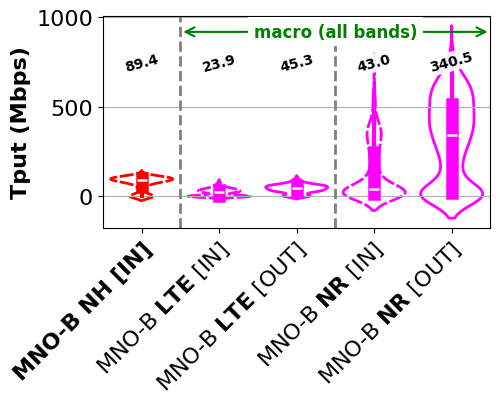

In [ ]:
# LTE/5G - PDSCH - NormTput
fig, ax = plt.subplots(figsize=(5, 2.75))
palette = ['red', 'magenta', 'magenta', 'magenta', 'magenta']
data = pd.concat([
    df_lte_pdsch_agg_tmo_nh_in.assign(Collection_plot='TMO NH IN'),
    # df_lte_pdsch_agg_att_mno_in.assign(Collection_plot='[LTE] ATT MNO IN'),
    # df_lte_pdsch_agg_att_mno_out.assign(Collection_plot='[LTE] ATT MNO OUT'),
    df_lte_pdsch_agg_tmo_mno_in.assign(Collection_plot='[LTE] TMO MNO IN'),
    df_lte_pdsch_agg_tmo_mno_out.assign(Collection_plot='[LTE] TMO MNO OUT'),
    # df_lte_pdsch_agg_vzn_mno_in.assign(Collection_plot='[LTE] VZN MNO IN'),
    # df_lte_pdsch_agg_vzn_mno_out.assign(Collection_plot='[LTE] VZN MNO OUT'),
    df_5g_pdsch_agg_tmo_mno_in.assign(Collection_plot='[5G] TMO MNO IN'),
    df_5g_pdsch_agg_tmo_mno_out.assign(Collection_plot='[5G] TMO MNO OUT'),
    # df_5g_pdsch_agg_vzn_mno_in.assign(Collection_plot='[5G] VZN MNO IN'),
    # df_5g_pdsch_agg_vzn_mno_out.assign(Collection_plot='[5G] VZN MNO OUT')
])
sns.violinplot(data=data, x='Collection_plot', y='Net PDSCH Throughput', hue='Collection_plot', palette=palette, fill=False, linewidth=2, ax=ax)
# new_labels = ['MNO-B NH [IN]', 'MNO-A [IN]', 'MNO-A [OUT]', 'MNO-B [IN]', 'MNO-B [OUT]', 'MNO-C [IN]', 'MNO-C [OUT]', 'MNO-B [IN]', 'MNO-B [OUT]', 'MNO-C [IN]', 'MNO-C [OUT]']
new_labels = ['MNO-B NH [IN]', r'MNO-B $\bf{LTE}$ [IN]', r'MNO-B $\bf{LTE}$ [OUT]', r'MNO-B $\bf{NR}$ [IN]', r'MNO-B $\bf{NR}$ [OUT]']
ax.set_xticklabels(new_labels, rotation=45, ha='right')

ax.collections[0].set_linestyle((0,(5,1)))
ax.collections[1].set_linestyle((0,(5,1)))
ax.collections[3].set_linestyle((0,(5,1)))
# ax.collections[5].set_linestyle((0,(5,1)))
# ax.collections[7].set_linestyle((0,(5,1)))
# ax.collections[9].set_linestyle((0,(5,1)))

plt.axvline(x=0.5, color='gray', linestyle='--', linewidth=2)
plt.axvline(x=2.5, color='gray', linestyle='--', linewidth=2)

medians = data.groupby('Collection_plot')['Net PDSCH Throughput'].median()
for i, collection in enumerate(data['Collection_plot'].unique()):
    median_value = medians[collection]
    ax.text(i, 7e5, f'{medians[collection]/1e3:.1f}',ha='center', color='black', fontsize=10, fontweight='bold', rotation=15,bbox=dict(facecolor='white', alpha=0.9, edgecolor='none', boxstyle='round,pad=0.2'))

ax.annotate(
    '', xy=(4.5, 0.925), xytext=(0.5, 0.925),
    xycoords=('data', 'axes fraction'),
    textcoords=('data', 'axes fraction'),
    arrowprops=dict(arrowstyle='<->', color='green', lw=1.5),
)
ax.text(3/5, 0.925, 'macro (all bands)', transform=ax.transAxes,
        ha='center', va='center', fontsize=12, fontweight='bold', color='green',
        bbox=dict(facecolor='white', alpha=1, edgecolor='none'))

# ax.annotate(
#     '', xy=(10.5, 0.925), xytext=(6.5, 0.925),
#     xycoords=('data', 'axes fraction'),
#     textcoords=('data', 'axes fraction'),
#     arrowprops=dict(arrowstyle='<->', color='green', lw=1.5),
# )
# ax.text(9/11, 0.925, 'macro (all)', transform=ax.transAxes,
#         ha='center', va='center', fontsize=12, fontweight='bold', color='green',
#         bbox=dict(facecolor='white', alpha=1, edgecolor='none'))

plt.xticks(rotation=45, ha='right')
dx = 10 / 72
dy = 0 / 72
offset = ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
labels = plt.gca().get_xticklabels()

for label in labels:
    if label.get_text() in ['MNO-B NH [IN]']:
        label.set_fontweight('bold')

plt.xlabel('')
plt.ylabel('Tput (Mbps)', fontsize=16, fontweight='bold')
# plt.title('LTE/5G - Radio - RSRP/SS-RSRP', fontsize=16, fontweight='bold')
plt.grid(True, axis='y')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y/1e3)}'))
# plt.ylim(0, 6.2)
# plt.savefig('figs/pdsch_agg_select_tput.pdf', bbox_inches='tight')
plt.show()
# del fig, ax, dx, dy, offset, label, data, palette, labels